# ***Importing Libraries***

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
%matplotlib inline
sns.set_style('whitegrid')

# ***Loading the Data***

In [25]:
# Load the dataset
try:
    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File 'train.csv' not found. Please upload it to your Colab session.")

# Display the first 5 rows of the dataset
df.head()

Dataset loaded successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Initial Data Inspection***



In [26]:
# Get a concise summary of the dataframe
df.info()

print("\n" + "="*40 + "\n")

# Get descriptive statistics for numerical columns
print(df.describe())

print("\n" + "="*40 + "\n")

# Check for the number of missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592  

# ***Data Cleaning and Preprocessing***

In [27]:
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop other unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Verify that there are no more missing values (except in columns we decided to keep as is)
print("Missing values after cleaning:")
print(df.isnull().sum())

# Display the first 5 rows of the cleaned data
df.head()

Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipython-input-1182473653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1182473653.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ***Exploratory Data Analysis (EDA): Univariate Analysis***



> **Survival Count**



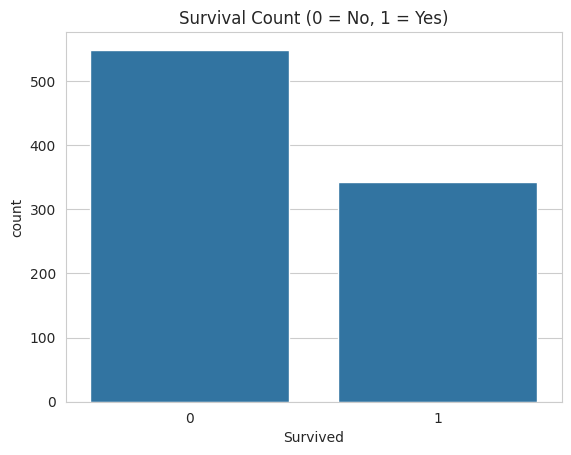

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [28]:
# Plotting the survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Show percentage
print(df['Survived'].value_counts(normalize=True) * 100)



> **Distribution by Gender and Class**



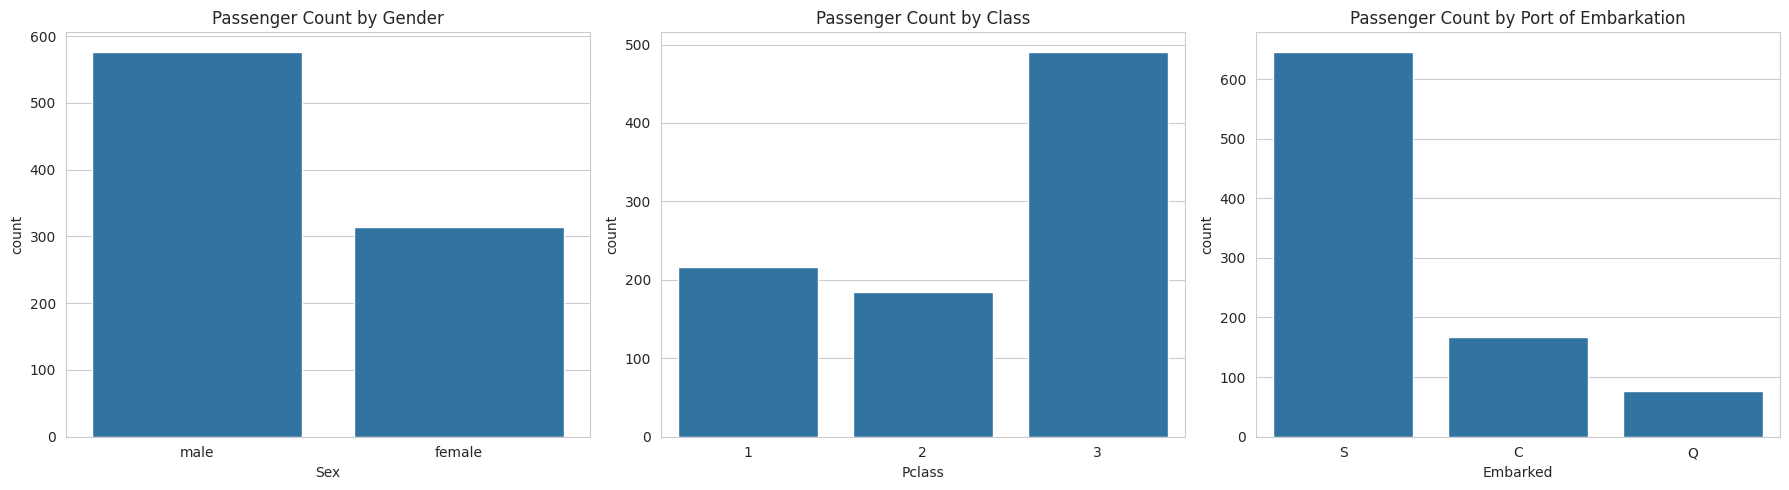

In [29]:
# Plotting distributions for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Passenger Count by Gender')

sns.countplot(x='Pclass', data=df, ax=axes[1])
axes[1].set_title('Passenger Count by Class')

sns.countplot(x='Embarked', data=df, ax=axes[2])
axes[2].set_title('Passenger Count by Port of Embarkation')

plt.tight_layout()
plt.show()



> **Age Distribution**



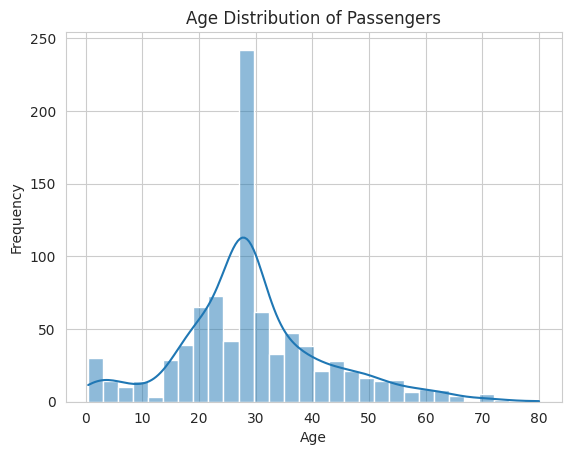

In [30]:
# Plotting the distribution of passenger age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# ***Exploratory Data Analysis (EDA): Bivariate Analysis***



> **Survival by Gender**



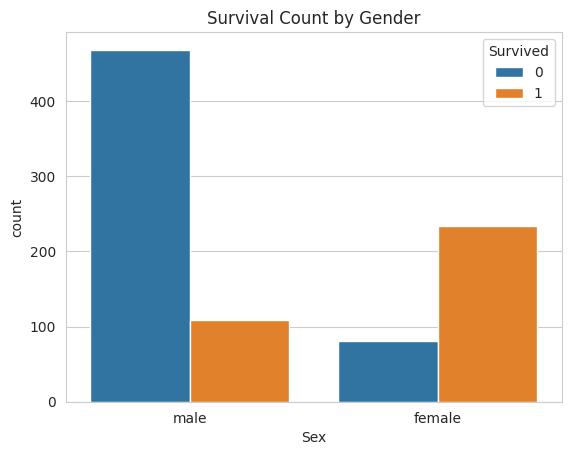

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: proportion, dtype: float64


In [31]:
# Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Calculate survival percentage by gender
print(df.groupby('Sex')['Survived'].value_counts(normalize=True) * 100)



> **Survival by Passenger Class**



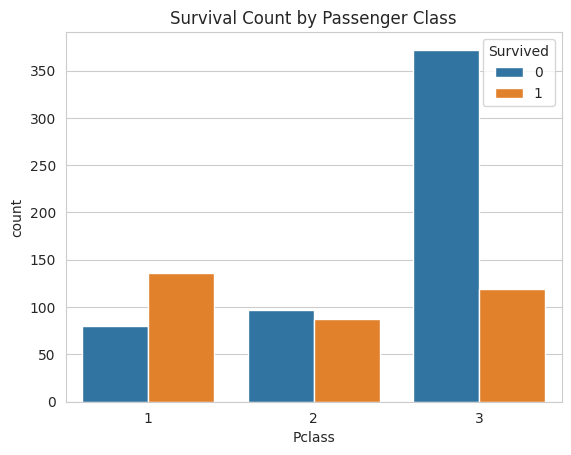

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64


In [32]:
# Survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Calculate survival percentage by class
print(df.groupby('Pclass')['Survived'].value_counts(normalize=True) * 100)



> **Survival by Age**



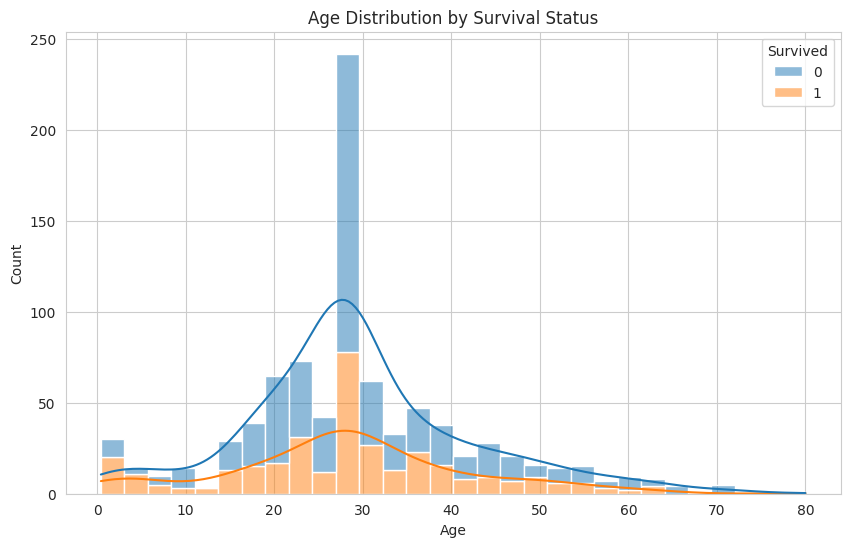

In [33]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()

# ***Exploratory Data Analysis (EDA): Multivariate Analysis***

> **Correlation Heatmap**



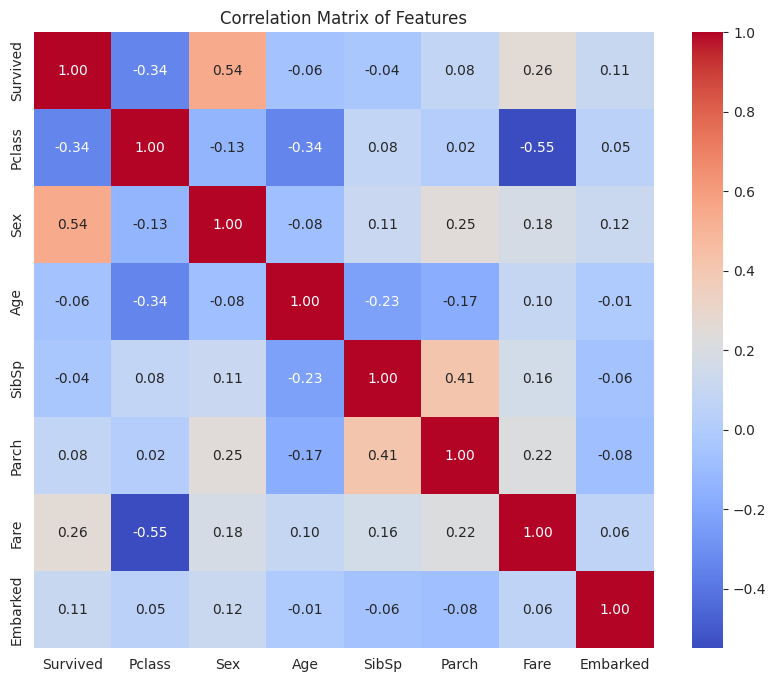

In [34]:
# First, convert 'Sex' and 'Embarked' to numerical values for the correlation matrix
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()



> **Survival based on Class and Gender**



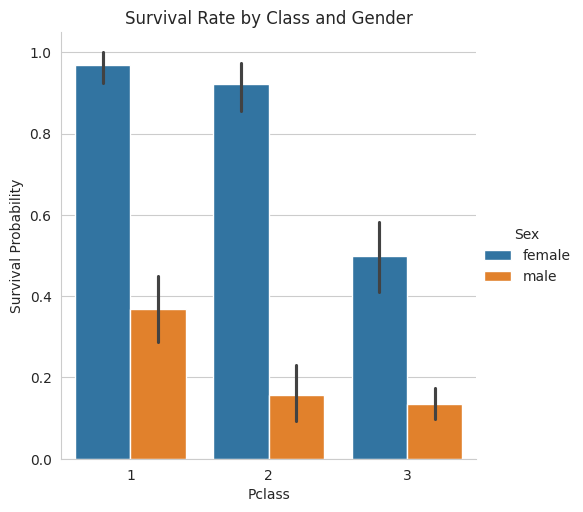

In [35]:
# Using catplot to visualize relationship between Pclass, Sex, and Survived
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Probability')
plt.show()